In [4]:
# !pip install accelerate
# !pip install bitsandbyte
# !pip install trl
# !pip install peft
# !pip install transformers
# !pip install datasets

In [2]:
# write a code to mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from datasets import load_dataset, Dataset, DatasetDict

df = pd.read_csv("/content/amazon_product_details.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/amazon_product_details.csv'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [7]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08HDJ86NZ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [8]:
df['category'].value_counts()

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
...,...
Health&PersonalCare|HomeMedicalSupplies&Equipment|HealthMonitors|WeighingScales|DigitalBathroomScales,1
"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|EspressoMachines",1
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAccessories,1


In [48]:
df1=df[['product_name','category','about_product' ]]

In [49]:
df['category']

,category
0,Computers&Accessories|Accessories&Peripherals|...
1,Computers&Accessories|Accessories&Peripherals|...
2,Computers&Accessories|Accessories&Peripherals|...
3,Computers&Accessories|Accessories&Peripherals|...
4,Computers&Accessories|Accessories&Peripherals|...
...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe..."
1463,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E..."


In [50]:
df1['category']=df1['category'].apply(lambda x: x.split('|')[-1])

<ipython-input-50-044ca62adb71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category']=df1['category'].apply(lambda x: x.split('|')[-1])


In [51]:
df1

,product_name,category,about_product
0,Wayona Nylon Braided USB to Lightning Fast Cha...,USBCables,High Compatibility : Compatible With iPhone 12...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,USBCables,"Compatible with all Type C enabled devices, be..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,USBCables,【 Fast Charger& Data Sync】-With built-in safet...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,USBCables,The boAt Deuce USB 300 2 in 1 cable is compati...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,USBCables,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,WaterPurifierAccessories,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Rice&PastaCookers,"230 Volts, 400 watts, 1 Year"
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,HeatConvectors,International design and styling|Two heat sett...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,ExhaustFans,Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [52]:
df1['category'].value_counts()

,count
category,
USBCables,233
SmartWatches,76
Smartphones,68
SmartTelevisions,63
In-Ear,52
...,...
Split-SystemAirConditioners,1
SmallApplianceParts&Accessories,1
StovetopEspressoPots,1


In [19]:
## now suppose i want t train a model for multi tasking like
## when i ask to generate the product name for a category, it should be generating the product names for that categories, otheriwse, if not mentioned, it should generate the description.

## in this case, i need to do some pre-processing of the dataset.
## to handle this multi-tasking, we need to add one more collumn like task-type.

In [53]:
products = df1[['category', 'product_name']]
#products

description = df1[['category','about_product']]
description

products = products.rename(columns={'product_name' : 'text'})
description = description.rename(columns={'about_product' : 'text'})

products['task_type'] = 'Product Name'
description['task_type'] = 'Product Description'

df2=pd.concat([products,description], ignore_index=True)

In [54]:
df2

,category,text,task_type
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name
3,USBCables,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Product Name
4,USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Product Name
...,...,...,...
2925,WaterPurifierAccessories,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,Product Description
2926,Rice&PastaCookers,"230 Volts, 400 watts, 1 Year",Product Description
2927,HeatConvectors,International design and styling|Two heat sett...,Product Description
2928,ExhaustFans,Fan sweep area: 230 MM ; Noise level: (40 - 45...,Product Description


In [55]:
dataset = Dataset.from_pandas(df2)

In [56]:
dataset

Dataset({
    features: ['category', 'text', 'task_type'],
    num_rows: 2930
})

In [57]:
dataset = Dataset.from_pandas(df2)
dataset=dataset.shuffle(seed=0)
dataset=dataset.train_test_split(test_size=0.3)
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text', 'task_type'],
        num_rows: 2051
    })
    test: Dataset({
        features: ['category', 'text', 'task_type'],
        num_rows: 879
    })
})

In [58]:
dataset['test'][0]

{'category': 'ScreenProtectors',
 'text': 'OpenTech® Military-Grade Tempered Glass Screen Protector Compatible for iPhone 13/13 Pro / 14 with Edge to Edge Coverage and Easy Installation kit (6.1 Inches)',
 'task_type': 'Product Name'}

In [59]:
## Data analysis

products['text_tokens']=products['text'].apply(lambda x:len(x.split())*1.5)
description['text_tokens']=description['text'].apply(lambda x:len(x.split())*1.5)

In [60]:
products

,category,text,task_type,text_tokens
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name,48.0
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name,46.5
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name,40.5
3,USBCables,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Product Name,48.0
4,USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Product Name,30.0
...,...,...,...,...
1460,WaterPurifierAccessories,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Product Name,52.5
1461,Rice&PastaCookers,Prestige Delight PRWO Electric Rice Cooker (1 ...,Product Name,13.5
1462,HeatConvectors,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Product Name,18.0
1463,ExhaustFans,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,Product Name,13.5


<Axes: >

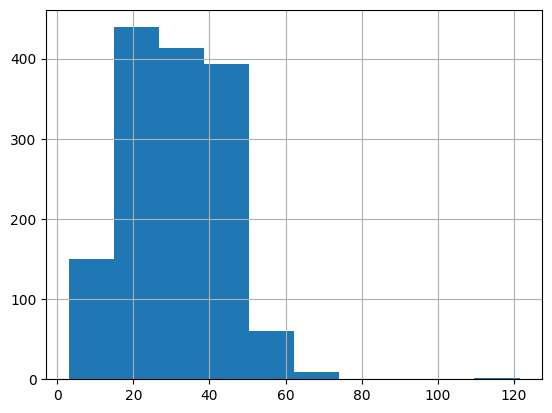

In [61]:
products['text_tokens'].hist()

<Axes: >

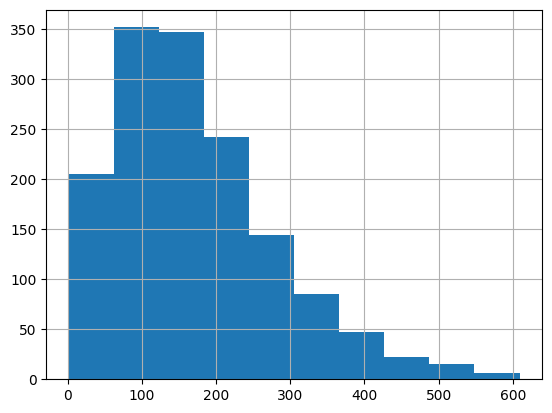

In [62]:
description['text_tokens'].hist()

## Load base model and prepare for training

In [63]:
def formatting_func(example):
    text = f"""
            Given the product category, you need to genrate a '{example['task_type']}'.
            ### Category:{example['category']}\n ### {example['task_type']}: {example['text']}
            """
    return text

In [64]:
dataset['train'][0]

{'category': 'Macro&RinglightFlashes',
 'text': 'RING LIGHT WITH USB - High power 10W Ring LED is suitable for most devices that support USB ports, such as laptops, PCs, mobile power, USB chargers, AC adapters, etc.There are four buttons on the selfie ring light, which can be turned on / off, switch the lighting mode and adjust the brightness level, it is easy to find your favorite option in seconds. Ideal for using lighting in the studio, makeup in the locker room, camping, live streaming, etc.|INTELLIGENT AND QUICK COLOR CHANGE - TYGOT makes it easy to adjust the color temperature from 3400K to 5600K easily without using color filters. Achieve cold white light or warm light to hide blemishes and change skin tones quickly and easily. LED SMD design and 220pcs LED beads on our Ring Light offers more light for your camera photography, live streaming, Facebook Live, beauty makeup, selfies and videos.|DIMMABLE LED RING LIGHT - The LED ring light is equipped with 220 high-quality SMD LEDs 

In [65]:
formatting_func(dataset['train'][0])

' \n            Given the product category, you need to genrate a \'Product Description\'.\n            ### Category:Macro&RinglightFlashes\n ### Product Description: RING LIGHT WITH USB - High power 10W Ring LED is suitable for most devices that support USB ports, such as laptops, PCs, mobile power, USB chargers, AC adapters, etc.There are four buttons on the selfie ring light, which can be turned on / off, switch the lighting mode and adjust the brightness level, it is easy to find your favorite option in seconds. Ideal for using lighting in the studio, makeup in the locker room, camping, live streaming, etc.|INTELLIGENT AND QUICK COLOR CHANGE - TYGOT makes it easy to adjust the color temperature from 3400K to 5600K easily without using color filters. Achieve cold white light or warm light to hide blemishes and change skin tones quickly and easily. LED SMD design and 220pcs LED beads on our Ring Light offers more light for your camera photography, live streaming, Facebook Live, beaut

In [66]:
print(formatting_func(dataset['train'][0]))

 
            Given the product category, you need to genrate a 'Product Description'.
            ### Category:Macro&RinglightFlashes
 ### Product Description: RING LIGHT WITH USB - High power 10W Ring LED is suitable for most devices that support USB ports, such as laptops, PCs, mobile power, USB chargers, AC adapters, etc.There are four buttons on the selfie ring light, which can be turned on / off, switch the lighting mode and adjust the brightness level, it is easy to find your favorite option in seconds. Ideal for using lighting in the studio, makeup in the locker room, camping, live streaming, etc.|INTELLIGENT AND QUICK COLOR CHANGE - TYGOT makes it easy to adjust the color temperature from 3400K to 5600K easily without using color filters. Achieve cold white light or warm light to hide blemishes and change skin tones quickly and easily. LED SMD design and 220pcs LED beads on our Ring Light offers more light for your camera photography, live streaming, Facebook Live, beauty make

In [35]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 8.6 MB/s eta 0:00:00


## load base model and tokeinze

In [67]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

base_model_id = "microsoft/phi-2"

# model = AutoModelForCausalLM.from_pretrained(base_model_id, trust_remote_code = True,
#                                              torch_dtype = torch.float16, load_in_8bit=True)


model = AutoModelForCausalLM.from_pretrained( base_model_id,
    torch_dtype=torch.float16,  # or omit this entirely
    trust_remote_code=True
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [68]:
tokenizer = AutoTokenizer.from_pretrained(base_model_id, padding_side='left',
add_eos_token=True,
add_bos_token=True,
use_fast = False
)

In [84]:
tokenizer.pad_token = tokenizer.eos_token
max_length = 300

In [85]:
def tokenize(prompt):
  result = tokenizer(
      formatting_func(prompt),
      truncation=True,
      max_length=max_length,
      padding="max_length"
  )
  result['labels'] = result['input_ids'].copy()
  return result

Load the base model and tokenize

In [86]:
print(tokenize(dataset['train'][0]))

{'input_ids': [50256, 220, 198, 50276, 15056, 262, 1720, 6536, 11, 345, 761, 284, 2429, 4873, 257, 705, 15667, 12489, 4458, 198, 50276, 21017, 21743, 25, 14155, 305, 5, 39687, 2971, 7414, 7465, 198, 44386, 8721, 12489, 25, 371, 2751, 406, 9947, 13315, 8450, 532, 3334, 1176, 838, 54, 12569, 12365, 318, 11080, 329, 749, 4410, 326, 1104, 8450, 14090, 11, 884, 355, 26635, 11, 21869, 11, 5175, 1176, 11, 8450, 2609, 364, 11, 7125, 46363, 11, 3503, 13, 1858, 389, 1440, 12163, 319, 262, 38704, 5858, 1657, 11, 543, 460, 307, 2900, 319, 1220, 572, 11, 5078, 262, 12019, 4235, 290, 4532, 262, 22204, 1241, 11, 340, 318, 2562, 284, 1064, 534, 4004, 3038, 287, 4201, 13, 41765, 329, 1262, 12019, 287, 262, 8034, 11, 16029, 287, 262, 17355, 2119, 11, 22498, 11, 2107, 11305, 11, 3503, 13, 91, 1268, 9328, 3069, 3528, 3525, 5357, 19604, 11860, 20444, 1581, 5870, 27746, 532, 24412, 38, 2394, 1838, 340, 2562, 284, 4532, 262, 3124, 5951, 422, 4974, 405, 42, 284, 7265, 405, 42, 3538, 1231, 1262, 3124, 16628, 1

In [87]:
dataset=dataset.map(tokenize)

Map:   0%|          | 0/2051 [00:00<?, ? examples/s]

Map:   0%|          | 0/879 [00:00<?, ? examples/s]

In [88]:
eval_prompt = """
Given the product category, you need to genrate a 'Product Description'.
### Category: BatteryChargers
### Product Description:
"""

In [89]:
model_input = tokenizer(
    eval_prompt,
    truncation=True,
    max_length=max_length,
    padding="max_length",
    return_tensors="pt"
)

In [91]:
model_input

{'input_ids': tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 5

In [76]:
model.eval()

with torch.no_grad():
  output = model.generate(**model_input, max_new_tokens=256,
                                        repetition_penalty=1.15)
  result = tokenizer.decode(output[0], skip_special_tokens=True)
  print(result)



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


KeyboardInterrupt: 

Lets configure the QLORA config

In [92]:
from peft import LoraConfig, get_peft_model

target_modules = ['WqKv', 'fc1','fc2']
config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=target_modules,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, config)
#

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 2.12 MiB is free. Process 60020 has 14.74 GiB memory in use. Of the allocated memory 14.38 GiB is allocated by PyTorch, and 239.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [78]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): PhiForCausalLM(
      (model): PhiModel(
        (embed_tokens): Embedding(51200, 2560)
        (layers): ModuleList(
          (0-31): 32 x PhiDecoderLayer(
            (self_attn): PhiAttention(
              (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
              (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
              (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
              (dense): Linear(in_features=2560, out_features=2560, bias=True)
            )
            (mlp): PhiMLP(
              (activation_fn): NewGELUActivation()
              (fc1): lora.Linear(
                (base_layer): Linear(in_features=2560, out_features=10240, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=2560, 

In [79]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()

    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [80]:
print_trainable_parameters(model)

trainable params: 26214400 || all params: 2805898240 || trainable%: 0.9342605382581515


In [81]:
from accelerate import Accelerator

accelerator = Accelerator(gradient_accumulation_steps=1)

model = accelerator.prepare_model(model)



In [82]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [83]:
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling

from datetime import datetime

project = "phi-2-finetune"
run_name = "train-dir"
output_dir = "./"+run_name+"-"+datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=2,
    evaluation_strategy="steps",
    eval_steps=25,
    logging_steps=20,
    gradient_accumulation_steps=1,
    num_train_epochs=2,
    do_eval=True,
    warmup_ratio=0.0,
    save_steps =25,
    logging_dir="./logs",
    optim="paged_adamw_32bit",
    learning_rate=2e-4,
    max_steps=500,
)

trainer =Trainer(
    model=model,
    args=args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['test'],
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
)

model.config.use_cache = False
trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


OutOfMemoryError: CUDA out of memory. Tried to allocate 32.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 14.12 MiB is free. Process 60020 has 14.72 GiB memory in use. Of the allocated memory 14.37 GiB is allocated by PyTorch, and 232.26 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

## Lets try trained model (Koad PEFT Model and use it for prediction)

By default the PEFT Library will only save the Qlora adpater, so, we need to first load the base model from the huggingface hub.

Load the based model ----> Merge the PEFT Model

In [ ]:
import torch
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    trust_remote_code = True,
    load_in_8bit = True,
    torch.dtype = torch.float16
).to('cuda')

eval_tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token = True,
    trust_remote_code = True,
    use_fast =False

)